In [1]:
import pandas as pd
import sys
sys.path.append('../src')
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import pearsonr


df_clients_profile = pd.read_csv('../Data/raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/raw/df_final_experiment_clients.txt')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

In [2]:
#clean df_clients_profile
df_clients_profile = print_clean_data(df_clients_profile)

Before
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
------------------------------------------
------------------------------------------
After
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


In [3]:
#clean df_experiment_clients
df_experiment_clients = print_clean_data(df_experiment_clients)

Before
client_id        0
Variation    20109
dtype: int64
------------------------------------------
To many NaN values in column: Variation
------------------------------------------
After
client_id        0
Variation    20109
dtype: int64


In [4]:
#clean df_web_data
df_web_data = print_clean_data(df_web_data)

Before
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
------------------------------------------
------------------------------------------
After
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [ ]:
df_web_data.head(5)

## Create a data frame with the clients that won't participe in the experiment.

In [5]:
#setting aside the clients that wont be part if the experiment
null_df_experiment_clients = df_experiment_clients[df_experiment_clients['Variation'].isnull()]
null_df_experiment_clients

,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


## Merge the clients in the web data

### Identify the clients part of the test group

In [7]:
#id of clients that are part of the test
df_experiment_clients_Test = df_experiment_clients[df_experiment_clients['Variation'] == 'Test']
df_experiment_clients_Test.head(10)

,client_id,Variation
0,9988021,Test
1,8320017,Test
3,1982004,Test
5,9466803,Test
6,3170143,Test
8,5887227,Test
10,438567,Test
11,2519971,Test
13,5407849,Test
16,5308474,Test


### df_test: combine visit_id with visitor_id and reoganize the columns.

In [8]:
final_df_Test = pd.merge(df_experiment_clients_Test, df_clients_profile, on='client_id', how='inner')
final_df_Test = pd.merge(df_web_data, final_df_Test, on='client_id', how='inner')
df_test = final_df_Test

#change the data type to datetime
df_test['date_time'] = pd.to_datetime(df_test['date_time']) 
df_test.head(5)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


### df_control: combine visit_id with visitor_id and reoganize the columns.

In [9]:
#id of clients that are part of the control group
df_experiment_clients_Control = df_experiment_clients[df_experiment_clients['Variation'] == 'Control']
df_experiment_clients_Control.head(10)

,client_id,Variation
2,4033851,Control
4,9294070,Control
7,6651403,Control
9,2105948,Control
12,9814849,Control
14,7286739,Control
15,4446011,Control
20,4229407,Control
24,2842481,Control
27,1218661,Control


In [11]:
df_experiment_clients_Control = df_experiment_clients[df_experiment_clients['Variation'] == 'Control']
final_df_Control = pd.merge(df_experiment_clients_Control, df_clients_profile, on='client_id', how='inner')
final_df_Control = pd.merge(df_web_data, final_df_Control, on='client_id', how='inner')
df_control = final_df_Control

#change the data type to datetime
df_control['date_time'] = pd.to_datetime(df_control['date_time']) 
df_control.head(5)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0


### Combine df_test and df_control as df_combined for comparative analysis

In [12]:
df_combined = pd.concat([df_test, df_control]).reset_index(drop=True)
df_combined.shape

(321195, 14)

In [123]:
# Save the DataFrame to CSV

df_combined.to_csv('../Data/Tableau/df_combined.csv', index=False)


## Pivot and create new columns

### df_test

In [ ]:
df_test

In [13]:
# Assuming df_control is your DataFrame
# 1. Data Preparation:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_test['date'] = df_test['date_time'].dt.date
# Combine visit_id and visitor_id into a new column
df_test['visit_visitor_id'] = df_test['visit_id'].astype(str) + "_" + df_test['visitor_id'].astype(str)

In [14]:
# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_test = df_test.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_test['next_date_time'] = df_test.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)

# Calculate time spent in seconds, but make sure it's always positive
df_test['time_diff_seconds'] = (df_test['next_date_time'] - df_test['date_time']).dt.total_seconds()
df_test['time_diff_minutes'] = df_test['time_diff_seconds'] / 60

In [26]:
# 3. Pivot to Create Step Columns:
df_pivot = df_test.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0, aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None  # Remove the 'process_step' header
df_pivot.head(10)

,client_id,visitor_id,visit_id,confirm,start,step_1,step_2,step_3
0,555,402506806_56087378777,637149525_38041617439_716659,0.000000,0.116667,0.533333,1.650000,0.333333
1,647,66758770_53988066587,40369564_40101682850_311847,0.000000,0.116667,0.300000,3.150000,2.716667
2,934,810392784_45004760546,7076463_57954418406_971348,0.000000,2.366667,0.000000,0.000000,0.000000
3,1336,920624746_32603333901,583743392_96265099036_939815,0.000000,0.416667,0.433333,0.850000,1.816667
4,1336,920624746_32603333901,614001770_19101025926_112779,1.366667,0.000000,0.000000,0.000000,0.000000
5,1346,123474046_4204671056,27144337_83739845380_214282,0.000000,2.650000,3.366667,0.816667,1.416667
6,1516,182314299_63168583136,255400977_38039535960_779641,0.000000,0.933333,0.583333,10.116667,4.266667
7,1516,182314299_63168583136,481123290_95510977345_707323,0.000000,1.333333,1.666667,1.083333,0.000000
8,1643,121807985_20524560478,753205700_16851596206_134483,0.000000,1.000000,0.266667,9.700000,0.500000
9,1643,910842861_51062379179,379946188_1773022140_107963,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
# 4. Rename Columns & Calculate Total Time:
df_pivot = df_pivot.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot['total_time_visit'] = df_pivot[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)

# 5. Merge with Original Data and Select/Reorder Columns:
final_df_t = pd.merge(df_pivot, df_test[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')

In [28]:
# Get last step per visit_id
final_df_t['last_step'] = final_df_t.groupby('visit_id')['process_step'].transform('last')

# Add new columns counting the number of times each step was visited
step_counts = df_test.groupby(['visit_visitor_id', 'process_step']).size().unstack(fill_value=0)

# Add new columns counting the number of times each step was visited
final_df_t['visit_visitor_id'] = final_df_t['visit_id'].astype(str) + "_" + final_df_t['visitor_id'].astype(str)
final_df_t['start_step'] = final_df_t['visit_visitor_id'].map(step_counts.get('start', pd.Series())).fillna(0).astype(int)
final_df_t['1st_step'] = final_df_t['visit_visitor_id'].map(step_counts.get('step_1', pd.Series())).fillna(0).astype(int)
final_df_t['2nd_step'] = final_df_t['visit_visitor_id'].map(step_counts.get('step_2', pd.Series())).fillna(0).astype(int)
final_df_t['3rd_step'] = final_df_t['visit_visitor_id'].map(step_counts.get('step_3', pd.Series())).fillna(0).astype(int)


# Create completion column
final_df_t['completion'] = final_df_t['last_step'].apply(lambda x: 1 if x == 'confirm' else 0)

# Create total_navigation column
final_df_t['navigations_bt_start_last'] =  final_df_t['1st_step'] + final_df_t['2nd_step'] + final_df_t['3rd_step'] 

In [29]:
# Drop visit_visitor_id column if no longer needed
final_df_t.drop(['visit_id', 'visitor_id','process_step', 'confirm_time'], axis=1, inplace=True)
final_df_t.drop_duplicates(subset='visit_visitor_id', keep='first', inplace=True)
# Reorder columns for better visualization
df_test_final = final_df_t.reindex(columns=[
    'client_id', 'visit_visitor_id', 'start_time', 'step_1', 'step_2', 'step_3', 
    'date', 'start_step', '1st_step', '2nd_step', '3rd_step', 'navigations_bt_start_last', 'last_step', 'completion',
    'total_time_visit', 'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 
    'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'
])


In [ ]:
df_test_final.head(10)

### df_control

In [30]:
# Assuming df_control is your DataFrame
# 1. Data Preparation:
df_control['date_time'] = pd.to_datetime(df_control['date_time'])
df_control['date'] = df_control['date_time'].dt.date
# Combine visit_id and visitor_id into a new column
df_control['visit_visitor_id'] = df_control['visit_id'].astype(str) + "_" + df_control['visitor_id'].astype(str)

In [19]:
# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_control = df_control.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_control['next_date_time'] = df_control.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)

# Calculate time spent in seconds, but make sure it's always positive
df_control['time_diff_seconds'] = (df_control['next_date_time'] - df_control['date_time']).dt.total_seconds()
df_control['time_diff_minutes'] = df_control['time_diff_seconds'] / 60

In [20]:
# 3. Pivot to Create Step Columns:
df_pivot_c = df_control.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0, aggfunc='sum')
df_pivot_c = df_pivot_c.reset_index()
df_pivot_c.columns.name = None  # Remove the 'process_step' header

In [21]:
# 4. Rename Columns & Calculate Total Time:
df_pivot_c = df_pivot_c.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot_c['total_time_visit'] = df_pivot_c[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)

# 5. Merge with Original Data and Select/Reorder Columns:
final_df_c = pd.merge(df_pivot_c, df_control[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')

In [22]:
# Get last step per visit_id
final_df_c['last_step'] = final_df_c.groupby('visit_id')['process_step'].transform('last')

# Add new columns counting the number of times each step was visited
step_counts = df_control.groupby(['visit_visitor_id', 'process_step']).size().unstack(fill_value=0)

# Add new columns counting the number of times each step was visited
final_df_c['visit_visitor_id'] = final_df_c['visit_id'].astype(str) + "_" + final_df_c['visitor_id'].astype(str)
final_df_c['start_step'] = final_df_c['visit_visitor_id'].map(step_counts.get('start', pd.Series())).fillna(0).astype(int)
final_df_c['1st_step'] = final_df_c['visit_visitor_id'].map(step_counts.get('step_1', pd.Series())).fillna(0).astype(int)
final_df_c['2nd_step'] = final_df_c['visit_visitor_id'].map(step_counts.get('step_2', pd.Series())).fillna(0).astype(int)
final_df_c['3rd_step'] = final_df_c['visit_visitor_id'].map(step_counts.get('step_3', pd.Series())).fillna(0).astype(int)


# Create completion column
final_df_c['completion'] = final_df_c['last_step'].apply(lambda x: 1 if x == 'confirm' else 0)

# Create total_navigation column

final_df_c['navigations_bt_start_last'] = final_df_c['1st_step'] + final_df_c['2nd_step'] + final_df_c['3rd_step'] 

In [23]:

# Drop visit_visitor_id column if no longer needed
final_df_c.drop(['visit_id', 'visitor_id','process_step', 'confirm_time'], axis=1, inplace=True)
final_df_c.drop_duplicates(subset='visit_visitor_id', keep='first', inplace=True)
# Reorder columns for better visualization
df_control_final = final_df_c.reindex(columns=[
    'client_id', 'visit_visitor_id', 'start_time', 'step_1', 'step_2', 'step_3', 
    'date', 'start_step', '1st_step', '2nd_step', '3rd_step', 'navigations_bt_start_last', 'last_step', 'completion',
    'total_time_visit', 'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 
    'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'
])


In [24]:
df_control_final.head(5)

,client_id,visit_visitor_id,start_time,step_1,step_2,step_3,date,start_step,1st_step,2nd_step,3rd_step,navigations_bt_start_last,last_step,completion,total_time_visit,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,1028,557292053_87239438319_391157_42237450_62128060588,0.816667,1.566667,4.733333,1.85,2017-04-08,1,5,2,1,8,step_1,0,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0
9,1104,543158812_46395476577_767725_194240915_1815800...,0.000000,0.000000,0.000000,0.00,2017-06-12,1,0,0,0,0,start,0,0.000000,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0
10,1104,643221571_99977972121_69283_194240915_18158000533,0.000000,0.000000,0.000000,0.00,2017-06-20,1,0,0,0,0,start,0,0.000000,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0
11,1186,507052512_11309370126_442139_446844663_3161510...,0.000000,0.000000,0.000000,0.00,2017-04-08,1,0,0,0,0,start,0,0.000000,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0
12,1186,795373564_99931517312_810896_446844663_3161510...,0.183333,0.183333,0.000000,0.00,2017-04-08,1,1,1,0,2,step_2,0,0.366667,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0


### Combine data frames df_test_final and df_control_final as df_final for comparatrive analysis

In [31]:
df_final = pd.concat([df_test_final, df_control_final]).reset_index(drop=True)
df_final.head(5)

,client_id,visit_visitor_id,start_time,step_1,step_2,step_3,date,start_step,1st_step,2nd_step,3rd_step,navigations_bt_start_last,last_step,completion,total_time_visit,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,555,637149525_38041617439_716659_402506806_5608737...,0.116667,0.533333,1.65,0.333333,2017-04-15,1,1,1,1,3,confirm,1,2.633333,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
1,647,40369564_40101682850_311847_66758770_53988066587,0.116667,0.300000,3.15,2.716667,2017-04-12,1,1,1,1,3,confirm,1,6.283333,Test,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0
2,934,7076463_57954418406_971348_810392784_45004760546,2.366667,0.000000,0.00,0.000000,2017-04-18,4,0,0,0,0,start,0,2.366667,Test,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0
3,1336,583743392_96265099036_939815_920624746_3260333...,0.416667,0.433333,0.85,1.816667,2017-05-08,1,1,1,1,3,confirm,1,3.516667,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0
4,1336,614001770_19101025926_112779_920624746_3260333...,0.000000,0.000000,0.00,0.000000,2017-05-08,0,0,0,0,0,confirm,1,1.366667,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0


In [124]:
df_final.to_csv('../Data/Tableau/df_final.csv', index=False)

## Correlation between numerical variables

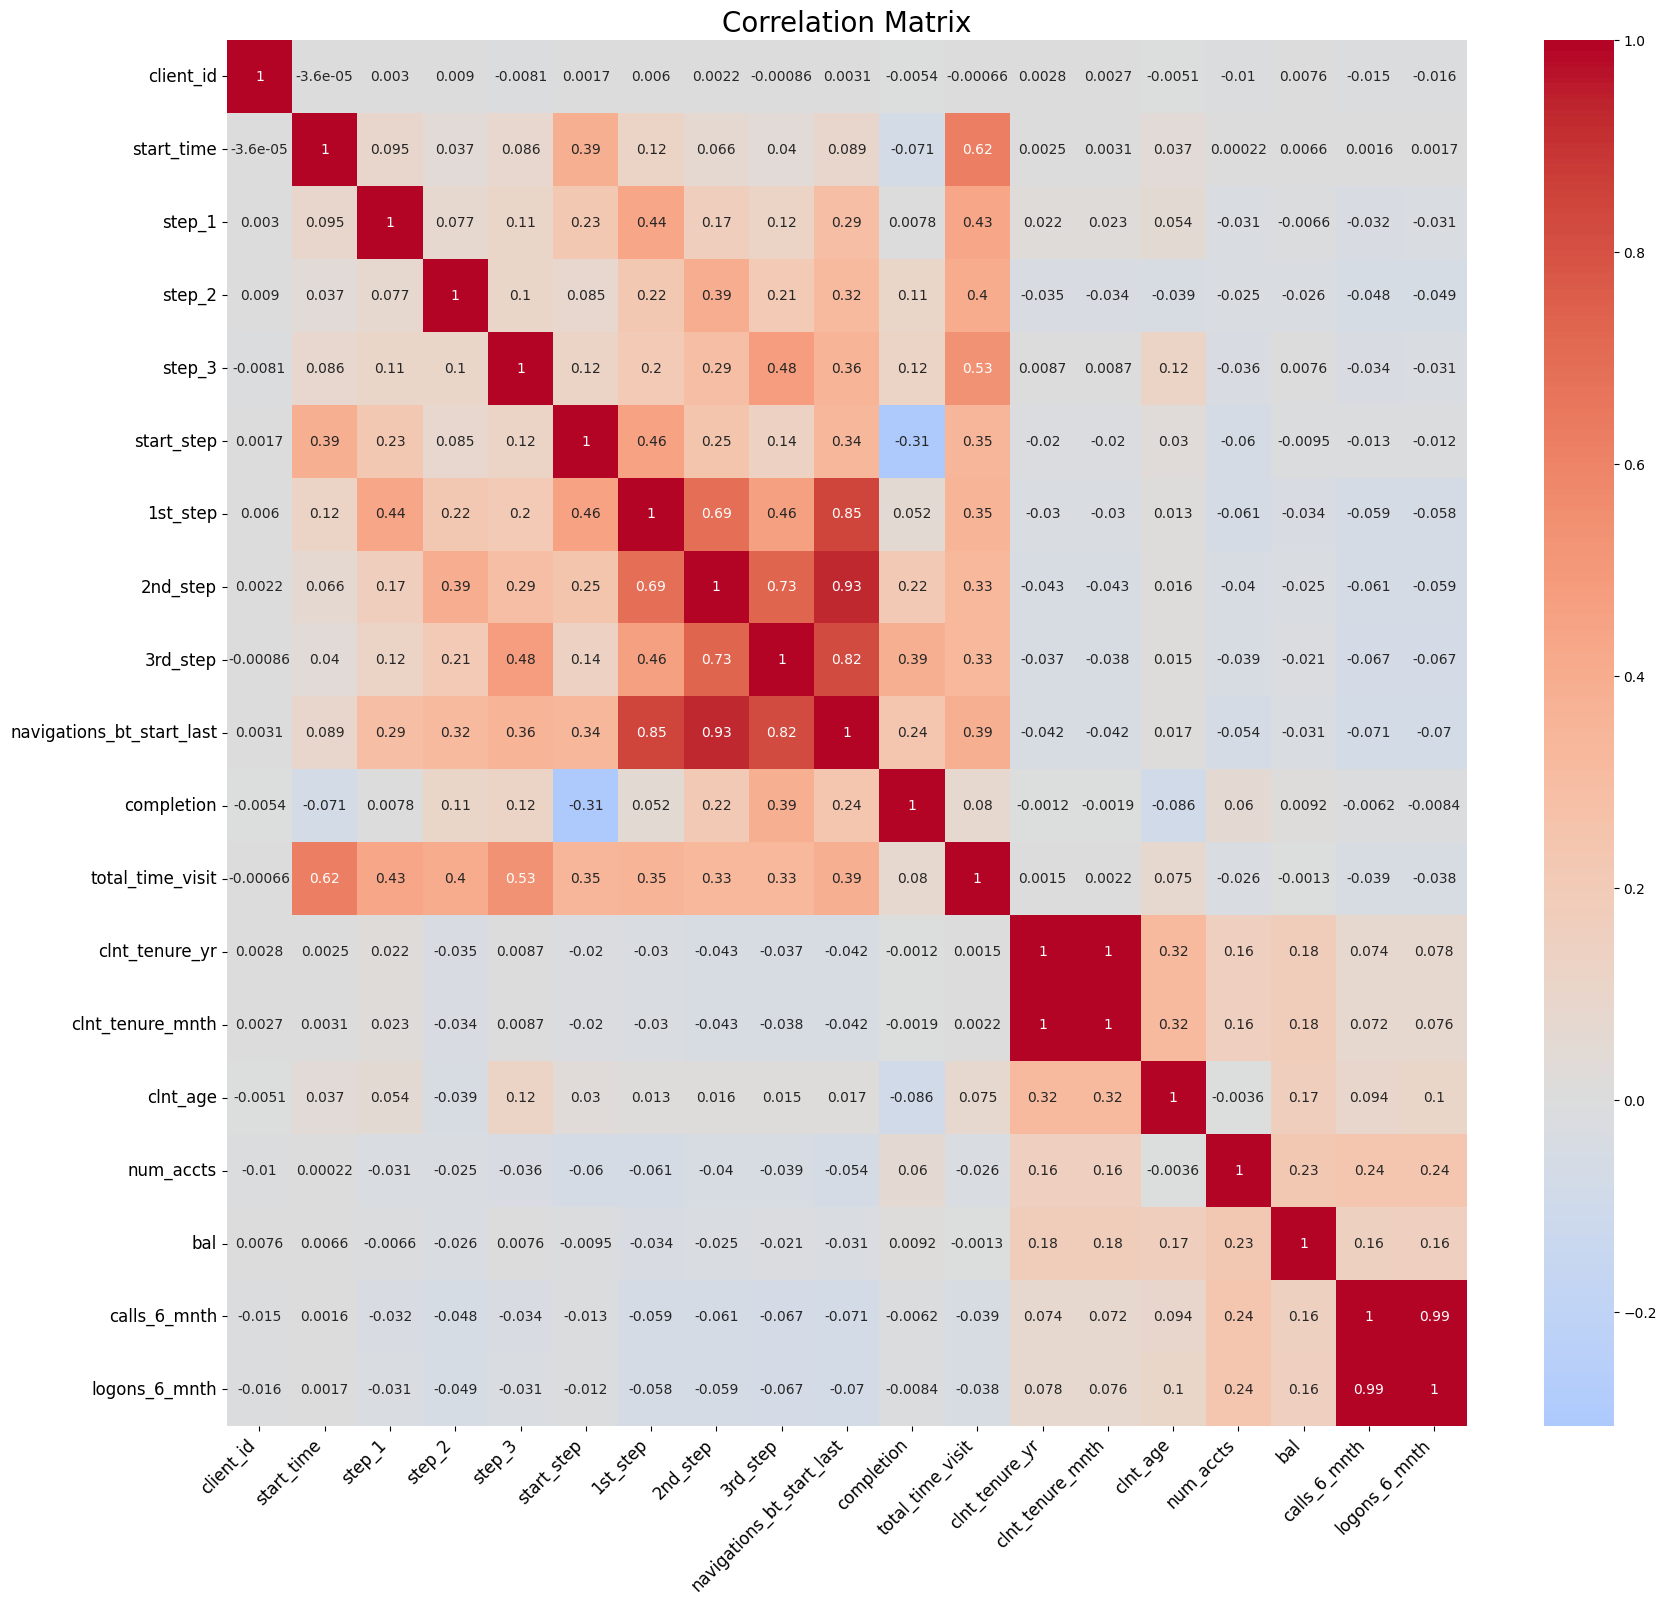

In [32]:
correlation_matrix = df_test_final.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 10})  # Adjust font size
plt.title('Correlation Matrix', fontsize=20)  # Adjust title font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust x-axis tick labels
plt.yticks(rotation=0, fontsize=12)  # Adjust y-axis tick labels
plt.show()

#### Listing of variables corelated with completion variable with their corelation coefficient and p-values

In [33]:
import pandas as pd
    
# function for calculating pearson correlation coefficient and p-value between 'completion' and other  'numerical variables'

def calculate_correlation(df, var1, var2):
    correlation_coef, p_value = pearsonr(df[var1], df[var2])
    return correlation_coef, p_value

# Calculate correlation coefficient and p-value for 'total_navigations' and 'completion'
correlation_coef_tn, p_value_tn = calculate_correlation(df_final, 'navigations_bt_start_last', 'completion')

# Calculate correlation coefficient and p-value for 'start_step' and 'completion'
correlation_coef_ss, p_value_ss = calculate_correlation(df_final, 'start_step', 'completion')

# Calculate correlation coefficient and p-value for 'total_time_visit' and 'completion'
correlation_coef_ttv, p_value_ttv = calculate_correlation(df_final, 'total_time_visit', 'completion')

# Calculate correlation coefficient and p-value for 'clnt_tenure_yr' and 'completion'
correlation_coef_cty, p_value_cty = calculate_correlation(df_final, 'clnt_tenure_yr', 'completion')

# Calculate correlation coefficient and p-value for 'clnt_age' and 'completion'
correlation_coef_ca, p_value_ca = calculate_correlation(df_final, 'clnt_age', 'completion')

# Calculate correlation coefficient and p-value for 'num_accts' and 'completion'
correlation_coef_na, p_value_na = calculate_correlation(df_final, 'num_accts', 'completion')

# Calculate correlation coefficient and p-value for 'calls_6_mnth' and 'completion'
correlation_coef_c6m, p_value_c6m = calculate_correlation(df_final, 'calls_6_mnth', 'completion')

# Calculate correlation coefficient and p-value for 'logons_6_mnth' and 'completion'
correlation_coef_l6m, p_value_l6m = calculate_correlation(df_final, 'logons_6_mnth', 'completion')

# Create a dictionary with the correlation coefficient and p-value for each variable
correlation_data = {
    'Variable': ['navigations_bt_start_last', 'start_step', 'total_time_visit', 'clnt_tenure_yr', 'clnt_age', 'num_accts', 'calls_6_mnth', 'logons_6_mnth'],
    'Correlation Coefficient': [correlation_coef_tn, correlation_coef_ss, correlation_coef_ttv, correlation_coef_cty, correlation_coef_ca, correlation_coef_na, correlation_coef_c6m, correlation_coef_l6m],
    'P-value': [p_value_tn, p_value_ss, p_value_ttv, p_value_cty, p_value_ca, p_value_na, p_value_c6m, p_value_l6m]
}

# Create a DataFrame from the correlation data
correlation_table = pd.DataFrame(correlation_data)

# Print the correlation table
correlation_table

,Variable,Correlation Coefficient,P-value
0,navigations_bt_start_last,0.339217,0.000000e+00
1,start_step,-0.259070,0.000000e+00
2,total_time_visit,0.125255,2.611848e-240
3,clnt_tenure_yr,-0.014905,8.706766e-05
4,clnt_age,-0.093312,8.106774e-134
5,num_accts,0.031850,4.997839e-17
6,calls_6_mnth,-0.029255,1.328559e-14
7,logons_6_mnth,-0.030828,4.761019e-16


In [34]:
df_final.columns

Index(['client_id', 'visit_visitor_id', 'start_time', 'step_1', 'step_2',
       'step_3', 'date', 'start_step', '1st_step', '2nd_step', '3rd_step',
       'navigations_bt_start_last', 'last_step', 'completion',
       'total_time_visit', 'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth',
       'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth'],
      dtype='object')

## Bivariate analysis

In [ ]:
# Scatter Plot (for continuous variables)
sns.scatterplot(x='variable1', y='variable2', data=df)
plt.title('Scatter Plot')
plt.show()

In [ ]:
# Box Plot (for categorical vs continuous)
sns.boxplot(x='categorical_variable', y='continuous_variable', data=df)
plt.title('Box Plot')
plt.show()

In [ ]:
# Bar Plot (for categorical variables)
sns.countplot(x='categorical_variable1', hue='categorical_variable2', data=df)
plt.title('Bar Plot')
plt.show()

## Statistical Tests

### Perform statistical tests to quantify the relationship between variables

In [ ]:
# Pearson Correlation (for continuous variables)
corr, p_value = pearsonr(df['variable1'], df['variable2'])
print(f"Pearson Correlation: {corr}, P-value: {p_value}")

In [ ]:
 # Chi-Square Test (for categorical variables)
contingency_table = pd.crosstab(df['categorical_variable1'], df['categorical_variable2'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2={chi2}, P-value={p}")

## Hypothesis testing

Test for Difference in Average Age
Hypothesis:
Null Hypothesis : The average age of clients engaging with the new process (Test) is the same as the average age of clients engaging with the old process (Control).
Alternative Hypothesis : The average age of clients engaging with the new process (Test) is different from the average age of clients engaging with the old process (Control).

In [ ]:
from scipy.stats import ttest_ind

# Extract ages for each group
test_age = df_final[df_final['Variation'] == 'Test']['clnt_age']
control_age = df_final[df_final['Variation'] == 'Control']['clnt_age']

# Perform t-test
t_stat_age, p_value_age = ttest_ind(test_age, control_age)
print(f'Age t-statistic: {t_stat_age}, p-value: {p_value_age}')

The average age of clients in the Test group is not significantly different from the average age of clients in the Control group.

2. Test for Difference in Average Client Tenure
Hypothesis:
Null Hypothesis: The average client tenure of those engaging with the new process (Test) is the same as those engaging with the old process (Control).
Alternative Hypothesis: The average client tenure of those engaging with the new process (Test) is different from those engaging with the old process (Control).

In [ ]:
# Extract tenures for each group
test_tenure = df_final[df_final['Variation'] == 'Test']['clnt_tenure_yr']
control_tenure = df_final[df_final['Variation'] == 'Control']['clnt_tenure_yr']

# Perform t-test
t_stat_tenure, p_value_tenure = ttest_ind(test_tenure, control_tenure)
print(f'Tenure t-statistic: {t_stat_tenure}, p-value: {p_value_tenure}')

The average tenure of clients in the Test group is not significantly different from the average tenure of clients in the Control group.

3. Test for Gender Differences in Engagement
Hypothesis:

Null Hypothesis: Gender does not affect the likelihood of engaging with the new process (Test) or the old process (Control).
Alternative Hypothesis: Gender affects the likelihood of engaging with the new process (Test) or the old process (Control).

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_gender_process = pd.crosstab(df_final['gendr'], df_final['Variation'])

# Perform Chi-Square test
chi2_stat_gender, p_value_gender, dof, ex = chi2_contingency(contingency_table_gender_process)
print(contingency_table_gender_process), print(f'Chi-square statistic for gender and process: {chi2_stat_gender}, p-value: {p_value_gender}')

Gender does not appear to have a significant effect on whether clients engage with the new process (Test) or the old process (Control).

Test for completion rate

In [57]:
completion_table = pd.crosstab(df_final['Variation'], df_final['completion'])

# Perform Chi-Square test
chi2_stat_completion, p_value_completion, dof, ex = chi2_contingency(completion_table)
print(f'Chi-square statistic for completion rates: {chi2_stat_completion}, p-value: {p_value_completion}')

Chi-square statistic for completion rates: 703.7294519176166, p-value: 4.620759680288328e-155


The completion rates for clients engaging with the new process (Test) are statistically significantly different from those engaging with the old process (Control).

In [56]:
completion_rates = df_final.groupby('Variation')['completion'].mean()
print(completion_rates)

Variation
Control    0.476554
Test       0.577420
Name: completion, dtype: float64


### Testing the Hypothesis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.

In [38]:
# Calculate Completion Rates
completion_rates = df_final.groupby('Variation')['completion'].mean()
completion_rate_test = completion_rates.get('Test', 0)
completion_rate_control = completion_rates.get('Control', 0)

In [39]:
# Calculate the percentage increase
if completion_rate_control != 0:
    percentage_increase = ((completion_rate_test - completion_rate_control) / completion_rate_control) * 100
else:
    percentage_increase = float('inf')  # Handle division by zero case

print(f'Completion rate for Test group: {completion_rate_test}')
print(f'Completion rate for Control group: {completion_rate_control}')
print(f'Percentage increase in completion rate: {percentage_increase}%')

Completion rate for Test group: 0.5774203976078875
Completion rate for Control group: 0.47655448867344086
Percentage increase in completion rate: 21.165661289902378%


Set up the Hypotheses:

Null Hypothesis (H0): The increase in completion rate is less than 5%.
Alternative Hypothesis (H1): The increase in completion rate is at least 5%.


In [40]:
# Perform the Two-Proportion Z-Test:
from statsmodels.stats.proportion import proportions_ztest

# Define number of successes (completed visits) and number of trials (total visits) for both groups
num_success_test = df_final[df_final['Variation'] == 'Test']['completion'].sum()
num_trials_test = len(df_final[df_final['Variation'] == 'Test'])
num_success_control = df_final[df_final['Variation'] == 'Control']['completion'].sum()
num_trials_control = len(df_final[df_final['Variation'] == 'Control'])

# Perform the two-proportion z-test
successes = [num_success_test, num_success_control]
trials = [num_trials_test, num_trials_control]
z_stat, p_value = proportions_ztest(successes, trials)

print(f'Two-proportion z-test statistic: {z_stat}')
print(f'p-value: {p_value}')

Two-proportion z-test statistic: 26.5355303785506
p-value: 3.772779681523872e-155


In [41]:
# Define the threshold for percentage increase
threshold = 5.0

# Check if the observed percentage increase meets or exceeds the threshold
if percentage_increase >= threshold:
    print('The observed increase in completion rate meets or exceeds the 5% threshold.')
else:
    print('The observed increase in completion rate does not meet the 5% threshold.')

# Interpret the p-value
if p_value < 0.05:
    print('The increase in completion rate is statistically significant.')
else:
    print('The increase in completion rate is not statistically significant.')

The observed increase in completion rate meets or exceeds the 5% threshold.
The increase in completion rate is statistically significant.


#### Hypothesis on Number of Accounts

In [42]:
# Extract total time visit for each group
test_time = df_final[df_final['Variation'] == 'Test']['total_time_visit']
control_time = df_final[df_final['Variation'] == 'Control']['total_time_visit']

# Perform t-test
t_stat_time, p_value_time = ttest_ind(test_time, control_time)
print(f'Total time visit t-statistic: {t_stat_time}, p-value: {p_value_time}')

Total time visit t-statistic: 8.195678831373497, p-value: 2.5339089883802613e-16


Reject the null hypothesis. This suggests that there is a statistically significant difference in the total time spent on the site between clients in the Test group (new process) and clients in the Control group (old process).

#### Hypothesis on Number of Accounts


Hypothesis: The average number of accounts is the same for clients engaging with the new process (Test) and those engaging with the old process (Control).
Alternative Hypothesis: The average number of accounts is different for clients engaging with the new process and those engaging with the old process.
Test: t-Test for independent samples.



In [43]:

# Extract number of accounts for each group
test_accounts = df_final[df_final['Variation'] == 'Test']['num_accts']
control_accounts = df_final[df_final['Variation'] == 'Control']['num_accts']
# Perform t-test
t_stat_accounts, p_value_accounts = ttest_ind(test_accounts, control_accounts)
print(f'Number of accounts t-statistic: {t_stat_accounts}, p-value: {p_value_accounts}')

Number of accounts t-statistic: -2.3994440909144426, p-value: 0.01642261042081469


Reject the null hypothesis. This indicates that there is a statistically significant difference in the number of accounts between the Test group and the Control group.

In [44]:
test_balances = df_final[df_final['Variation'] == 'Test']['bal']
control_balances = df_final[df_final['Variation'] == 'Control']['bal']

# Perform t-test
t_stat_balances, p_value_balances = ttest_ind(test_balances, control_balances)
print(f'Balance t-statistic: {t_stat_balances}, p-value: {p_value_balances}')

Balance t-statistic: 2.405946773199229, p-value: 0.016133216335126644


 Reject the null hypothesis. This implies that there is a statistically significant difference in the average balance between the Test group (new process) and the Control group (old process).

In [45]:
average_balance_test = df_final[df_final['Variation'] == 'Test']['bal'].mean()
average_balance_control = df_final[df_final['Variation'] == 'Control']['bal'].mean()

print(f'Average balance for Test group: {average_balance_test}')
print(f'Average balance for Control group: {average_balance_control}')

Average balance for Test group: 170277.44707962932
Average balance for Control group: 163254.5573925608


In [46]:
# Extract recent call activity for each group
test_calls = df_final[df_final['Variation'] == 'Test']['calls_6_mnth']
control_calls = df_final[df_final['Variation'] == 'Control']['calls_6_mnth']

# Perform t-test
t_stat_calls, p_value_calls = ttest_ind(test_calls, control_calls)
print(f'Calls in last 6 months t-statistic: {t_stat_calls}, p-value: {p_value_calls}')

Calls in last 6 months t-statistic: -3.2973508095615527, p-value: 0.000976505992265956


Reject the null hypothesis. This means that there is a statistically significant difference in the number of calls in the last 6 months between the Test group (new process) and the Control group (old process).

In [47]:
test_navigations = df_final[df_final['Variation'] == 'Test']['navigations_bt_start_last']
control_navigations = df_final[df_final['Variation'] == 'Control']['navigations_bt_start_last']

In [48]:
t_stat_navigations, p_value_navigations = ttest_ind(test_navigations, control_navigations)
print(f'Navigations between start and last t-statistic: {t_stat_navigations}, p-value: {p_value_navigations}')

Navigations between start and last t-statistic: 8.595203800696698, p-value: 8.481357697023248e-18


reject the null hypothesis. This means that there is a statistically significant difference in the number of navigations between the Test and Control groups.

Contextualize Findings:
If the Test group has more navigations: This might indicate increased user activity or engagement with the new process.
If the Test group has fewer navigations: This could suggest that the new process is more efficient or requires fewer steps.
Needs further investigations

### Hypothesis Testing for error rates

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the error rates between the Test and Control groups.
Alternative Hypothesis (H1): There is a significant difference in the error rates between the Test and Control groups.

In [ ]:
def calculate_error_rates(df):
    # Sort the dataframe by 'visit_id' and 'date_time'
    df = df.sort_values(by=['visit_id', 'date_time'])
    
    # Calculate the time difference between steps
    df['time_diff'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    
    # Convert 'process_step' to a category type and then to codes for numerical comparison
    df['process_step_code'] = df['process_step'].astype('category').cat.codes
    
    # Identify errors (going back to the previous step in less than 5 seconds)
    df['error'] = (df['time_diff'] < 5) & (df['process_step_code'].diff() < 0)
    
    # Calculate the daily error rate
    error_rate = df.groupby(df['date_time'].dt.date)['error'].mean()
    
    return error_rate

In [49]:
df_combined['date_time'] = pd.to_datetime(df_combined['date_time'])

# Sort by client_id, visit_id, and date_time
df_combined = df_combined.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate the time difference to the previous step
df_combined['time_to_previous_step'] = df_combined.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

# Identify errors: going back to a previous step in less than 5 seconds
df_combined['is_error'] = df_combined['time_to_previous_step'] < 30

# Calculate errors for Test and Control groups
errors_test = df_combined[(df_combined['Variation'] == 'Test') & (df_combined['is_error'])].shape[0]
errors_control = df_combined[(df_combined['Variation'] == 'Control') & (df_combined['is_error'])].shape[0]

# Calculate total users for each group
total_users_test = df_combined[df_combined['Variation'] == 'Test']['visit_id'].nunique()
total_users_control = df_combined[df_combined['Variation'] == 'Control']['visit_id'].nunique()

# Compute error rates
error_rate_test = errors_test / total_users_test
error_rate_control = errors_control / total_users_control

print(f'Error rate for Test group: {error_rate_test}')
print(f'Error rate for Control group: {error_rate_control}')


Error rate for Test group: 1.7322611928236624
Error rate for Control group: 1.560050961747615


In [50]:
# Perform the Chi-Square Test
from scipy.stats import chi2_contingency

# Calculate errors and non-errors for Test and Control groups
errors_test = df_combined[(df_combined['Variation'] == 'Test') & (df_combined['is_error'])].shape[0]
non_errors_test = df_combined[(df_combined['Variation'] == 'Test') & (~df_combined['is_error'])].shape[0]

errors_control = df_combined[(df_combined['Variation'] == 'Control') & (df_combined['is_error'])].shape[0]
non_errors_control = df_combined[(df_combined['Variation'] == 'Control') & (~df_combined['is_error'])].shape[0]

# Create a contingency table
contingency_table = [
    [errors_test, non_errors_test],  # Test group
    [errors_control, non_errors_control]  # Control group
]

# Perform the Chi-Square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in error rates between the Test and Control groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in error rates between the Test and Control groups.")

Chi-square statistic: 46.65951837809329, p-value: 8.445576173807279e-12
Reject the null hypothesis. There is a significant difference in error rates between the Test and Control groups.


## Visualization of different parameters

In [52]:
import plotly.graph_objects as go
filtered_df = df_test_final[df_test_final['navigations_bt_start_last'] <= 30]

# Calculate the frequency of 'total_navigations' for 'completion' values 0 and 1
freq_completion_0 = filtered_df[filtered_df['completion'] == 0]['navigations_bt_start_last'].value_counts().sort_index()
freq_completion_1 = filtered_df[filtered_df['completion'] == 1]['navigations_bt_start_last'].value_counts().sort_index()

# Create a line graph
fig = go.Figure()

# Line for completion = 0
fig.add_trace(go.Scatter(
    x=freq_completion_0.index,
    y=freq_completion_0.values,
    mode='lines+markers',
    name='Completion = 0',
    line=dict(color='blue')
))

# Line for completion = 1
fig.add_trace(go.Scatter(
    x=freq_completion_1.index,
    y=freq_completion_1.values,
    mode='lines+markers',
    name='Completion = 1',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total Navigations for Completion = 0 and 1',
    xaxis_title='navigations_bt_start_last',
    yaxis_title='Frequency',
    legend_title_text='Completion'
)

# Show the plot


In [53]:
filtered_df_control = df_control_final[df_control_final['navigations_bt_start_last'] <= 30]

# Calculate the frequency of 'total_navigations' for 'completion' values 0 and 1
freq_completion_0 = filtered_df_control[filtered_df_control['completion'] == 0]['navigations_bt_start_last'].value_counts().sort_index()
freq_completion_1 = filtered_df_control[filtered_df_control['completion'] == 1]['navigations_bt_start_last'].value_counts().sort_index()

# Create a line graph
fig = go.Figure()

# Line for completion = 0
fig.add_trace(go.Scatter(
    x=freq_completion_0.index,
    y=freq_completion_0.values,
    mode='lines+markers',
    name='Completion = 0',
    line=dict(color='blue')
))

# Line for completion = 1
fig.add_trace(go.Scatter(
    x=freq_completion_1.index,
    y=freq_completion_1.values,
    mode='lines+markers',
    name='Completion = 1',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total Navigations for Completion = 0 and 1',
    xaxis_title='navigations_bt_start_last',
    yaxis_title='Frequency',
    legend_title_text='Completion'
)

# Show the plot


In [55]:
filtered_df = df_final[(df_final['navigations_bt_start_last'] <= 30) & (df_final['completion'] == 1)]

# Calculate the frequency of 'navigations_bt_start_last' for each variation
freq = filtered_df.groupby('Variation')['navigations_bt_start_last'].value_counts().unstack().fillna(0)

# Normalize the frequencies
norm_freq = freq.div(freq.sum(axis=1), axis=0)

# Reset index for plotting
norm_freq = norm_freq.reset_index()

# Melt DataFrame for easier plotting
norm_freq_melted = norm_freq.melt(id_vars='Variation', var_name='Navigations', value_name='Normalized Frequency')
fig = go.Figure()

# Add traces for each variation
for variation in norm_freq_melted['Variation'].unique():
    df_variation = norm_freq_melted[norm_freq_melted['Variation'] == variation]
    fig.add_trace(go.Scatter(
        x=df_variation['Navigations'],
        y=df_variation['Normalized Frequency'],
        mode='lines+markers',
        name=variation
    ))

# Update layout
fig.update_layout(
    title='Total Navigations done bteween start and last page by ussrs who completed the process',
    xaxis_title='Navigations',
    yaxis_title='Normalized Frequency',
    legend_title='Variation',
    template='plotly_white'
)

# Show plot
fig.show()

In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data for the first month
start_date = df_test_final['date'].min()
end_date = start_date + pd.DateOffset(days=30)

filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_date)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_date)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (First Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the second month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)

# Filter data for the second month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_second_month) & (df_test_final['date'] < end_second_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_second_month) & (df_control_final['date'] < end_second_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Second Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the third month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)
start_third_month = end_second_month
end_third_month = start_third_month + pd.DateOffset(days=30)

# Filter data for the third month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_third_month) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_third_month) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Third Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the three months
start_date = df_test_final['date'].min()
end_third_month = start_date + pd.DateOffset(days=90)

# Filter data for the three months
filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Three Months)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['total_navigations'] == 3]
filtered_control_df = df_control_final[df_control_final['total_navigations'] == 3]

# Calculate daily completion rate for test data where total_navigations is 3
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data where total_navigations is 3
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Total Navigations = 3)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot

In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['total_steps'] == 5]
filtered_control_df = df_control_final[df_control_final['total_steps'] == 5]

# Count occurrences of total_navigations = 3 by date for test data
counts_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date).size()

# Count occurrences of total_navigations = 3 by date for control data
counts_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date).size()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=counts_test.index,
    y=counts_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=counts_control.index,
    y=counts_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total steps taken = 5 by Date',
    xaxis_title='Date',
    yaxis_title='Frequency of Total steps taken = 5',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Function to calculate error rate and completion rate
def calculate_rates(df):
    # Sort the dataframe by 'visit_id' and 'date_time'
    df = df.sort_values(by=['visit_id', 'date_time'])
    
    # Calculate the time difference between steps
    df['time_diff'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    # Identify completions (where process step is 'confirm')
    df['completion'] = df['process_step'] == 'confirm'
    
    # Convert 'process_step' to a category type and then to codes for numerical comparison
    df['process_step_code'] = df['process_step'].astype('category').cat.codes
    
    # Identify errors (going back to the previous step in less than 5 seconds)
    df['error'] = (df['time_diff'] < 3) & (df['process_step_code'].diff() < 0)
    
    # Calculate the daily error rate
    error_rate = df.groupby(df['date_time'].dt.date)['error'].mean()
    
    # Calculate the daily completion rate
    completion_rate = df.groupby(df['date_time'].dt.date)['completion'].mean()
    
    return error_rate, completion_rate

# Calculate rates for test data
error_rate_test, completion_rate_test = calculate_rates(df_test)

# Calculate rates for control data
error_rate_control, completion_rate_control = calculate_rates(df_control)

# Create a scatter plot with lines for error rate vs. completion rate
fig = go.Figure()

# Line+scatter for test data error rate
fig.add_trace(go.Scatter(
    x=error_rate_test.index,
    y=error_rate_test.values,
    mode='lines+markers',
    name='Test Data Error Rate',
    line=dict(shape='linear', color='red')
))

# Line+scatter for test data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_test.index,
    y=completion_rate_test.values,
    mode='lines+markers',
    name='Test Data Completion Rate',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data error rate
fig.add_trace(go.Scatter(
    x=error_rate_control.index,
    y=error_rate_control.values,
    mode='lines+markers',
    name='Control Data Error Rate',
    line=dict(shape='linear', color='orange')
))

# Line+scatter for control data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_control.index,
    y=completion_rate_control.values,
    mode='lines+markers',
    name='Control Data Completion Rate',
    line=dict(shape='linear', color='green')
))

# Update layout
fig.update_layout(
    title='Completion Rate vs. Error Rate (Test and Control Data)',
    xaxis_title='Date',
    yaxis_title='Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Rate Type'
)

# Show the plot

In [ ]:
def plot_distribution(df, variable, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[variable], kde=False, discrete=True, bins=range(df[variable].max() + 1))
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for total navigations in both test and control datasets
plot_distribution(df_test_final, 'total_navigations', 'Distribution of Total Navigations (Test Data)')
plot_distribution(df_control_final, 'total_navigations', 'Distribution of Total Navigations (Control Data)')

In [ ]:
from scipy.stats import shapiro

# Check normality for total_navigations
stat, p = shapiro(df_test_final['total_navigations'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
from scipy.stats import spearmanr, kendalltau

# Spearman correlation for test data
spearman_corr, spearman_p = spearmanr(df_test_final['total_navigations'], df_test_final['completion'])
print(f'Spearman correlation: {spearman_corr}, p-value: {spearman_p}')

# Kendall's Tau correlation for test data
kendall_corr, kendall_p = kendalltau(df_test_final['total_navigations'], df_test_final['completion'])
print(f'Kendall Tau correlation: {kendall_corr}, p-value: {kendall_p}')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_test_final['total_navigations'], kde=False, discrete=True)
plt.title('Histogram of Total Navigations')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_test_final['total_navigations'])
plt.title('Box Plot of Total Navigations')
plt.xlabel('Total Navigations')
plt.show()

In [ ]:
# Log Transformation
df_test_final['log_total_navigations'] = np.log1p(df_test_final['total_navigations'])

# Check normality again after transformation
stat, p = shapiro(df_test_final['log_total_navigations'])
print('Shapiro-Wilk Test after Log Transformation: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Transformed sample looks Gaussian (fail to reject H0)')
else:
    print('Transformed sample does not look Gaussian (reject H0)')

In [ ]:
import scipy.stats as stats
def plot_histogram(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Q-Q Plot
def plot_qqplot(data, column, title):
    plt.figure(figsize=(10, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# Box Plot
def plot_boxplot(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.xlabel(column)
    plt.show()

# Plot for 'total_navigations'
plot_histogram(df_test_final, 'total_navigations', 'Histogram of Total Navigations (Test Data)')
plot_qqplot(df_test_final, 'total_navigations', 'Q-Q Plot of Total Navigations (Test Data)')
plot_boxplot(df_test_final, 'total_navigations', 'Box Plot of Total Navigations (Test Data)')

In [ ]:
def shapiro_wilk_test(data, column):
    stat, p = stats.shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(data, column):
    stat, p = stats.kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
    print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Anderson-Darling Test
def anderson_darling_test(data, column):
    result = stats.anderson(data[column])
    print(f'Anderson-Darling Test for {column}: Statistic={result.statistic}')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'{sl}%: {column} looks Gaussian (fail to reject H0)')
        else:
            print(f'{sl}%: {column} does not look Gaussian (reject H0)')

# D'Agostino's K-squared Test
def dagostino_test(data, column):
    stat, p = stats.normaltest(data[column])
    print(f'D\'Agostino\'s K-squared Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Apply tests for 'total_navigations'
shapiro_wilk_test(df_test_final, 'total_navigations')
kolmogorov_smirnov_test(df_test_final, 'total_navigations')
anderson_darling_test(df_test_final, 'total_navigations')
dagostino_test(df_test_final, 'total_navigations')

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['total_navigations'], kde=True)
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.title('Log Transformed Data')
plt.show()

# Step by step EDA for numerical columns

In [ ]:
sns.histplot(df_test_final['navigations_bt_start_last'], kde=True)
plt.show()
sns.boxplot(df_test_final['navigations_bt_start_last'])
plt.show()

In [ ]:
from scipy.stats import shapiro
shapiro_test = shapiro(df_test_final['total_navigations'])
print(shapiro_test)

In [ ]:
from scipy import stats
z_scores = stats.zscore(df_test_final['total_navigations'])
outliers = np.where(np.abs(z_scores) > 3)
print(outliers)

In [ ]:
skewness = df_test_final['total_navigations'].skew()
kurtosis = df_test_final['total_navigations'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

In [ ]:
df_test_final['log_total_navigations'] = np.log(df_test_final['total_navigations'] + 1)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.show()

In [ ]:
df_test_final['sqrt_total_navigations'] = np.sqrt(df_test_final['total_navigations'])

# Check distribution of square root-transformed total_navigations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['sqrt_total_navigations'], kde=True)
plt.title('Histogram of Square Root-Transformed Total Navigations')

plt.subplot(1, 2, 2)
stats.probplot(df_test_final['sqrt_total_navigations'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Square Root-Transformed Total Navigations')

plt.show()

# Perform Shapiro-Wilk test for normality on square root-transformed data
shapiro_test_sqrt = stats.shapiro(df_test_final['sqrt_total_navigations'])
print(f'Shapiro-Wilk Test on Square Root-Transformed Data: Statistic={shapiro_test_sqrt.statistic}, p-value={shapiro_test_sqrt.pvalue}')

In [ ]:
df_test_final['yeojohnson_total_navigations'], fitted_lambda = stats.yeojohnson(df_test_final['total_navigations'])

# Check distribution of Yeo-Johnson transformed total_navigations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['yeojohnson_total_navigations'], kde=True)
plt.title('Histogram of Yeo-Johnson Transformed Total Navigations')

plt.subplot(1, 2, 2)
stats.probplot(df_test_final['yeojohnson_total_navigations'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Yeo-Johnson Transformed Total Navigations')

plt.show()

# Perform Shapiro-Wilk test for normality on Yeo-Johnson transformed data
shapiro_test_yeojohnson = stats.shapiro(df_test_final['yeojohnson_total_navigations'])
print(f'Shapiro-Wilk Test on Yeo-Johnson Transformed Data: Statistic={shapiro_test_yeojohnson.statistic}, p-value={shapiro_test_yeojohnson.pvalue}')

In [ ]:
def bootstrap_statistic(data, n_iterations=1000, stat_function=np.mean):
    bootstrapped_stats = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stats[i] = stat_function(sample)
    return bootstrapped_stats

# Bootstrapping the mean of total navigations
bootstrapped_means = bootstrap_statistic(df_test_final['total_navigations'].dropna())

# Calculate confidence intervals
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for the mean of total navigations:", confidence_interval)


import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df_test_final['total_navigations'], ax=axes[0], kde=True)
axes[0].set_title('Original Data')

sns.histplot(np.log1p(df_test_final['total_navigations']), ax=axes[1], kde=True)
axes[1].set_title('Log-Transformed Data')

plt.tight_layout()
plt.show()

In [ ]:
def bootstrap_statistic(data, n_iterations=1000, stat_function=np.mean):
    bootstrapped_stats = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stats[i] = stat_function(sample)
    return bootstrapped_stats

# Calculate bootstrapped means
bootstrapped_means = bootstrap_statistic(df_test_final['total_navigations'].dropna())

# Calculate 95% confidence intervals
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for the mean of total navigations:", confidence_interval)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of bootstrapped means
sns.histplot(bootstrapped_means, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label=f'Lower 95% CI: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label=f'Upper 95% CI: {confidence_interval[1]:.2f}')
plt.title('Bootstrapped Means of Total Navigations')
plt.xlabel('Mean of Total Navigations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
stat, p = shapiro(df_test_final['total_navigations'].dropna())
print(f'Statistic: {stat}, P-value: {p}')

import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df_test_final['total_navigations'], dist="norm", plot=plt)
plt.show()

In [ ]:
def bootstrap_mean(data, n_iterations=1000):
    boot_means = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means[i] = np.mean(sample)
    return boot_means

# Bootstrapped means for total_navigations
boot_means = bootstrap_mean(df_test_final['total_navigations'].dropna())

# Calculate 95% confidence intervals
ci_low, ci_high = np.percentile(boot_means, [2.5, 97.5])
print(f'95% Confidence Interval for the mean of total navigations: [{ci_low}, {ci_high}]')

# Plotting the bootstrapped means
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(boot_means, kde=True)
plt.axvline(ci_low, color='red', linestyle='--', label=f'Lower 95% CI: {ci_low:.2f}')
plt.axvline(ci_high, color='red', linestyle='--', label=f'Upper 95% CI: {ci_high:.2f}')
plt.title('Bootstrapped Means of Total Navigations')
plt.xlabel('Mean of Total Navigations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
z_scores = stats.zscore(df_test_final['total_time_visit'])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)  # Remove entries with z-score > 3
df_no_outliers = df_test_final[filtered_entries]

# Creating the violin plot without outliers
plt.figure(figsize=(10, 6))
sns.violinplot(x='completion', y='total_time_visit', data=df_no_outliers)
plt.title('Violin Plot of Total Navigations by Category (Outliers Removed)')
plt.show()

In [ ]:
df_no_outliers['log_total_navigations'] = np.log1p(df_no_outliers['total_time_visit'])

# Creating the violin plot with transformed data
plt.figure(figsize=(10, 6))
sns.violinplot(x='completion', y='total_time_visit', data=df_no_outliers)
plt.title('Violin Plot of Log Transformed Total Navigations by Category')
plt.show()

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_test_final['navigations_bt_start_last']))

# Define the threshold for identifying outliers
threshold = 3

# Get a boolean array indicating if each point is an outlier
outliers = z_scores > threshold

# Filter out the outliers
df_test_final_no_outliers = df_test_final[~outliers]

# Plotting the cleaned data
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_test_final_no_outliers['navigations_bt_start_last'], kde=True)
plt.title('Distribution of Total Navigations After Removing Outliers')
plt.xlabel('navigations_bt_start_last')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Q1 = df_test_final['navigations_bt_start_last'].quantile(0.25)
Q3 = df_test_final['navigations_bt_start_last'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_test_final_no_outliers = df_test_final[(df_test_final['navigations_bt_start_last'] >= lower_bound) & 
                                          (df_test_final['navigations_bt_start_last'] <= upper_bound)]

# Plotting the cleaned data
sns.histplot(df_test_final_no_outliers['navigations_bt_start_last'], kde=True)
plt.title('Distribution of Total Navigations After Removing Outliers')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

### Experiment Design

In [ ]:


# Experiment Design Evaluation with Visualizations
def experiment_evaluation_with_visualizations(df_control, df_test):
    control_size = df_control['visit_visitor_id'].nunique()
    test_size = df_test['visit_visitor_id'].nunique()

    print("Control Group Size:", control_size)
    print("Test Group Size:", test_size)

    # Plot Group Sizes
    plt.figure(figsize=(10, 5))
    plt.bar(['Control', 'Test'], [control_size, test_size], color=['blue', 'orange'])
    plt.title('Group Sizes')
    plt.ylabel('Number of Unique Visitors')
    plt.show()

    # Gender Distribution
    gender_dist_control = df_control['gendr'].value_counts(normalize=True)
    gender_dist_test = df_test['gendr'].value_counts(normalize=True)

    print("Gender Distribution Control:\n", gender_dist_control)
    print("Gender Distribution Test:\n", gender_dist_test)

    # Plot Gender Distribution
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].pie(gender_dist_control, labels=gender_dist_control.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
    axs[0].set_title('Gender Distribution - Control Group')

    axs[1].pie(gender_dist_test, labels=gender_dist_test.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    axs[1].set_title('Gender Distribution - Test Group')

    plt.show()

experiment_evaluation_with_visualizations(df_control_final, df_test_final)


In [ ]:
# Additional Data Needs
print("Additional data that could enhance the analysis:")
print("- Detailed logs of user interactions (e.g., clicks, hovers)")
print("- Feedback or survey data on user satisfaction")
print("- Data on external factors that could influence user behavior (e.g., marketing campaigns)")
